<a href="https://colab.research.google.com/github/muli2487/Twitter-Sentiment-Analysis-and-Bitcoin-Stock-Prediction/blob/master/Time_series_bit_coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# First, import the relevant modules
import requests
import json

In [29]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
r= requests.get('https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.json?api_key=Lq43ztbiWJ73CJUDPiye&start_date=2016-01-01&end_date=2020-2-29')
print(r.status_code)

200


In [0]:
dict = r.json()

In [31]:
#explore the structure of the dictionary
for key, value in dict.items() :
    print (key)

dataset


In [32]:
print(dict['dataset'])

{'id': 7692468, 'dataset_code': 'MKPRU', 'database_code': 'BCHAIN', 'name': 'Bitcoin Market Price USD', 'description': 'Data showing the USD market price from Mt.gox', 'refreshed_at': '2020-06-06T05:00:28.484Z', 'newest_available_date': '2020-06-07', 'oldest_available_date': '2009-01-03', 'column_names': ['Date', 'Value'], 'frequency': 'daily', 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2016-01-01', 'end_date': '2020-02-29', 'data': [['2020-02-29', 8804.72], ['2020-02-28', 8785.52], ['2020-02-27', 9309.15], ['2020-02-26', 9663.75], ['2020-02-25', 9989.39], ['2020-02-24', 9669.63], ['2020-02-23', 9696.58], ['2020-02-22', 9606.86], ['2020-02-21', 9604.72], ['2020-02-20', 10180.65], ['2020-02-19', 9703.93], ['2020-02-18', 9937.67], ['2020-02-17', 9904.17], ['2020-02-16', 10368.53], ['2020-02-15', 10242.43], ['2020-02-14', 10354.3], ['2020-02-13', 10275.38], ['2020-02-12', 9854.79], ['2020-02-11', 10162.41], ['2020-02-10'

In [33]:
# To make this clearer, let's iterate over the nested elements in the main dictionary

for key, value in dict['dataset'].items():
    print (key, value)

id 7692468
dataset_code MKPRU
database_code BCHAIN
name Bitcoin Market Price USD
description Data showing the USD market price from Mt.gox
refreshed_at 2020-06-06T05:00:28.484Z
newest_available_date 2020-06-07
oldest_available_date 2009-01-03
column_names ['Date', 'Value']
frequency daily
type Time Series
premium False
limit None
transform None
column_index None
start_date 2016-01-01
end_date 2020-02-29
data [['2020-02-29', 8804.72], ['2020-02-28', 8785.52], ['2020-02-27', 9309.15], ['2020-02-26', 9663.75], ['2020-02-25', 9989.39], ['2020-02-24', 9669.63], ['2020-02-23', 9696.58], ['2020-02-22', 9606.86], ['2020-02-21', 9604.72], ['2020-02-20', 10180.65], ['2020-02-19', 9703.93], ['2020-02-18', 9937.67], ['2020-02-17', 9904.17], ['2020-02-16', 10368.53], ['2020-02-15', 10242.43], ['2020-02-14', 10354.3], ['2020-02-13', 10275.38], ['2020-02-12', 9854.79], ['2020-02-11', 10162.41], ['2020-02-10', 9907.12], ['2020-02-09', 9807.54], ['2020-02-08', 9755.66], ['2020-02-07', 9614.9], ['2020-0

## Calculate what the highest and lowest opening prices were for the stock in this period.

In [34]:
p = dict['dataset']['data']
z= [x[1] for x in p]
res=[]
for val in z:
    if val!= None:
        res.append(val)
print("The maximum opening value in 2016 & 2020 was " +  str(max(res)))
print("The minimum opening value in 2016 & 2020 was " +  str(min(res)))

The maximum opening value in 2016 & 2020 was 19498.6833333
The minimum opening value in 2016 & 2020 was 368.38


In [0]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta 
from tqdm import tqdm_notebook as tqdm
plt.style.use('bmh')

In [0]:
url = 'https://www.quandl.com/api/v3/datasets/BCHAIN/MKPRU.csv?api_key=Lq43ztbiWJ73CJUDPiye&start_date=2016-01-01&end_date=2020-4-29'

In [38]:
df= pd.read_csv( url ,index_col = None)
df.head()

,Date,Value
0,2020-04-29,7790.66
1,2020-04-28,7699.27
2,2020-04-27,7549.52
3,2020-04-26,7507.08
4,2020-04-25,7477.60


In [39]:
df.tail()

,Date,Value
1576,2016-01-05,433.00
1577,2016-01-04,428.13
1578,2016-01-03,433.94
1579,2016-01-02,432.33
1580,2016-01-01,429.34


In [40]:
#Cleaning data
df.columns= ['DATE' ,'PRICE']
df.head()

,DATE,PRICE
0,2020-04-29,7790.66
1,2020-04-28,7699.27
2,2020-04-27,7549.52
3,2020-04-26,7507.08
4,2020-04-25,7477.60


In [0]:
#Covert into Datatime
df['DATE'] = pd.to_datetime(df['DATE'])

In [42]:
df.head()

,DATE,PRICE
0,2020-04-29,7790.66
1,2020-04-28,7699.27
2,2020-04-27,7549.52
3,2020-04-26,7507.08
4,2020-04-25,7477.60


In [0]:
df.set_index('DATE',inplace =True)

In [44]:
df.head()

,PRICE
DATE,
2020-04-29,7790.66
2020-04-28,7699.27
2020-04-27,7549.52
2020-04-26,7507.08
2020-04-25,7477.60


In [45]:
df.describe()

,PRICE
count,1581.000000
mean,5101.578212
std,3891.571269
min,368.380000
25%,964.706075
50%,5028.770000
75%,8025.257500
max,19498.683333


## Visualize the Data

In [0]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

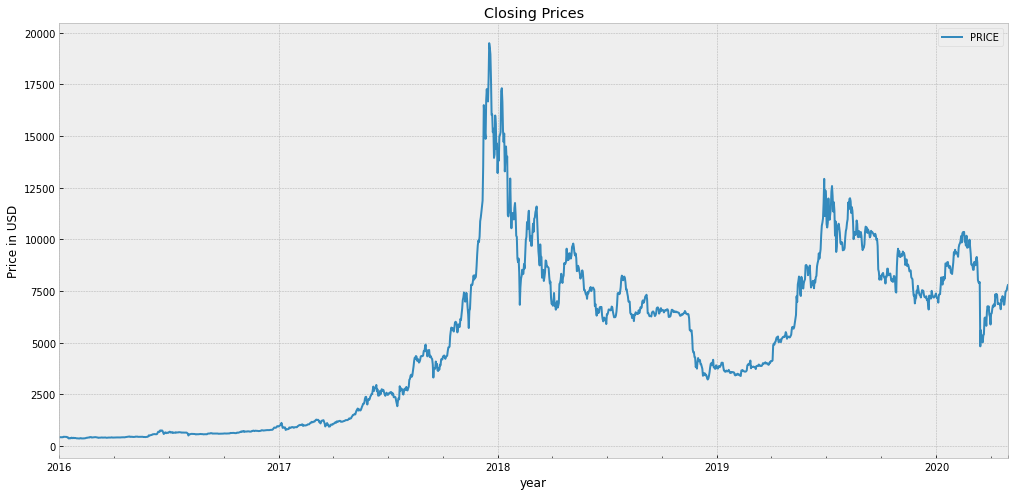

In [47]:
df.plot(figsize=(17,8), title='Closing Prices')
plt.xlabel('year')
plt.ylabel("Price in USD")
plt.show()

<Figure size 432x288 with 0 Axes>

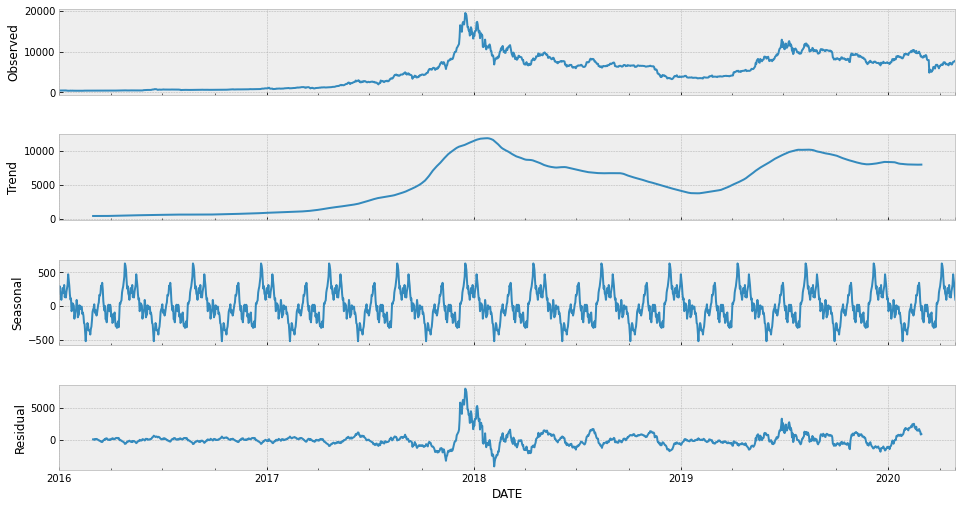

In [48]:
decomposition = seasonal_decompose(df.PRICE, model='additive',freq = 120)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [49]:
print(decomposition.trend)
print(decomposition.seasonal)
print(decomposition.resid) 

DATE
2020-04-29   NaN
2020-04-28   NaN
2020-04-27   NaN
2020-04-26   NaN
2020-04-25   NaN
              ..
2016-01-05   NaN
2016-01-04   NaN
2016-01-03   NaN
2016-01-02   NaN
2016-01-01   NaN
Name: PRICE, Length: 1581, dtype: float64
DATE
2020-04-29     97.806881
2020-04-28    179.060886
2020-04-27    308.113774
2020-04-26    390.801373
2020-04-25    472.772804
                 ...    
2016-01-05     95.176187
2016-01-04    164.733591
2016-01-03    187.733155
2016-01-02    298.149757
2016-01-01    260.406002
Name: PRICE, Length: 1581, dtype: float64
DATE
2020-04-29   NaN
2020-04-28   NaN
2020-04-27   NaN
2020-04-26   NaN
2020-04-25   NaN
              ..
2016-01-05   NaN
2016-01-04   NaN
2016-01-03   NaN
2016-01-02   NaN
2016-01-01   NaN
Name: PRICE, Length: 1581, dtype: float64


In [0]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [0]:
test_result=adfuller(df['PRICE'])

In [0]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(PRICE):
    result=adfuller(PRICE)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [53]:
adfuller_test(df['PRICE'])

ADF Test Statistic : -1.6304421695829738
p-value : 0.46725927244961346
#Lags Used : 24
Number of Observations Used : 1556
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [0]:
df['Price Difference'] = df['PRICE'] - df['PRICE'].shift(1)

In [55]:
 df['PRICE'].shift(1)

DATE
2020-04-29        NaN
2020-04-28    7790.66
2020-04-27    7699.27
2020-04-26    7549.52
2020-04-25    7507.08
               ...   
2016-01-05     431.90
2016-01-04     433.00
2016-01-03     428.13
2016-01-02     433.94
2016-01-01     432.33
Name: PRICE, Length: 1581, dtype: float64

In [56]:
df.head()

,PRICE,Price Difference
DATE,,
2020-04-29,7790.66,NaN
2020-04-28,7699.27,-91.39
2020-04-27,7549.52,-149.75
2020-04-26,7507.08,-42.44
2020-04-25,7477.60,-29.48


In [57]:
## Again test dickey fuller test
adfuller_test(df['Price Difference'].dropna())

ADF Test Statistic : -7.751622341193757
p-value : 9.984893327221735e-12
#Lags Used : 23
Number of Observations Used : 1556
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


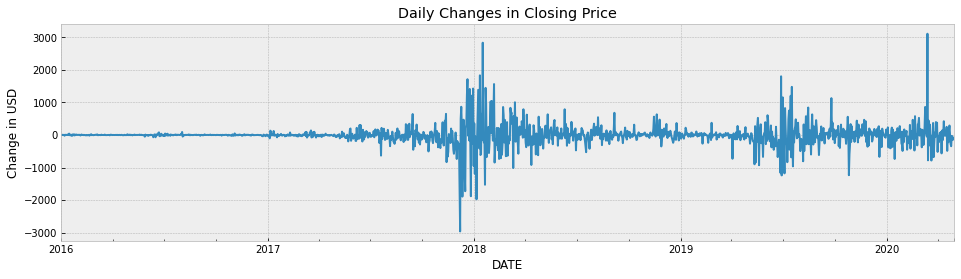

In [58]:
df['Price Difference'].plot(figsize=(16,4), title="Daily Changes in Closing Price")
plt.ylabel("Change in USD")
plt.show()

## Seasonal Difference

In [0]:
df['Seasonal First Difference']=df['PRICE']-df['PRICE'].shift(120)

In [60]:
df.head(140)

,PRICE,Price Difference,Seasonal First Difference
DATE,,,
2020-04-29,7790.66,NaN,NaN
2020-04-28,7699.27,-91.39,NaN
2020-04-27,7549.52,-149.75,NaN
2020-04-26,7507.08,-42.44,NaN
2020-04-25,7477.60,-29.48,NaN
...,...,...,...
2019-12-16,7067.74,-43.40,152.37
2019-12-15,7251.87,184.13,360.27
2019-12-14,7189.16,-62.71,315.92


In [61]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.876982439407388
p-value : 0.0480908460396994
#Lags Used : 24
Number of Observations Used : 1436
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


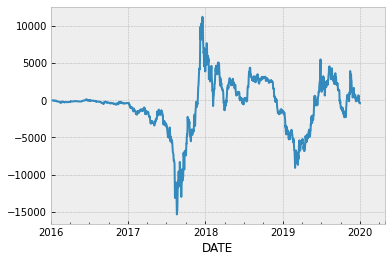

In [62]:
df['Seasonal First Difference'].plot()

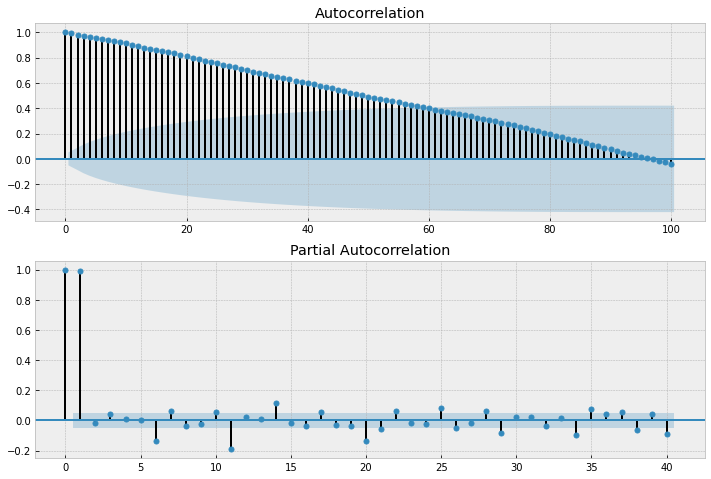

In [72]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[120:], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[120:], lags=40, ax=ax2)

## Auto Regressive Model¶

## From the above pacf plot my P = 2,q= 96,d =1

In [0]:
from statsmodels.tsa.arima_model import ARIMA


In [76]:
model=ARIMA(df['PRICE'],order=(2,1,1))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


In [66]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.PRICE   No. Observations:                 1580
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -11345.087
Method:                       css-mle   S.D. of innovations            317.824
Date:                Sat, 06 Jun 2020   AIC                          22698.175
Time:                        20:47:58   BIC                          22719.635
Sample:                    04-28-2020   HQIC                         22706.149
                         - 01-01-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.6563      7.902     -0.589      0.556     -20.145      10.832
ar.L1.D.PRICE     0.0001      0.025      0.005      0.996      -0.049       0.049
ar.L2.D.PRICE    -0.0119      0.025     -0.475      0.635      -0.061       0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0050           -9.1498j            9.1498           -0.2499
AR.2            0.0050           +9.1498j            9.1498            0.2499
-----------------------------------------------------------------------------
"""

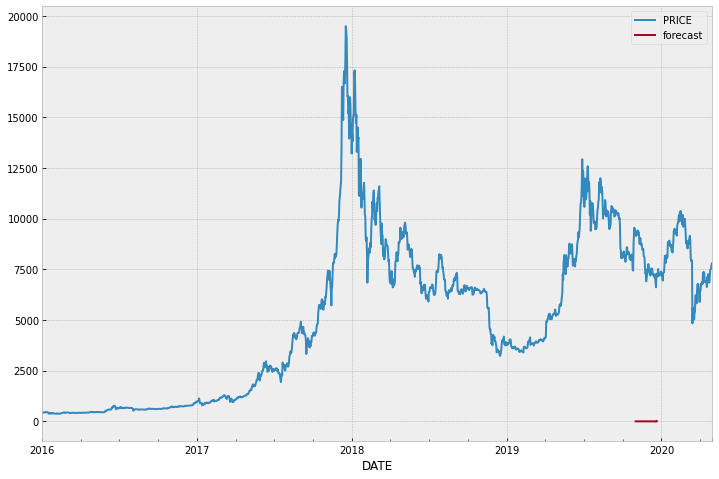

In [78]:
df['forecast']=model_fit.predict(start=130,end=180,dynamic=True)
df[['PRICE','forecast']].plot(figsize=(12,8))

## SARMA

In [0]:
import statsmodels.api as sm

In [83]:
model=sm.tsa.statespace.SARIMAX(df.PRICE,order=(2, 1, 0),seasonal_order=(2,1,0,97))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


KeyboardInterrupt: ignored

In [0]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['PRICE'])
plt.show()